## Clasificación Múltiple con el Dataset MINST

### Cargar el Dataset de MINST

IMportemos el mdoulo de MINST desde keras

In [1]:
from keras.api.datasets import mnist

Carguemos los datos a nuestras tuplas clásicas de Train y test

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [3]:
X_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [4]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [5]:
X_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [6]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [7]:
%matplotlib inline

Importa matplotlib como plt

In [8]:
import matplotlib.pyplot as plt

Importa Seaborn

In [9]:
import seaborn as sns

Pon su escala a 2

In [10]:
sns.set(font_scale=2)

Importa Numpy

In [11]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [12]:
indice = np.random.choice(np.arange(len(X_train)), 24, replace=False)

In [13]:
indice

array([56651, 37293, 52275, 52852,  5366,  6812,  1924,  4968,  2556,
       33408, 35894, 43293, 45986, 15317,  2139, 12951, 59971, 51410,
       30660, 15909,  6317, 12332, 13893,  8732])

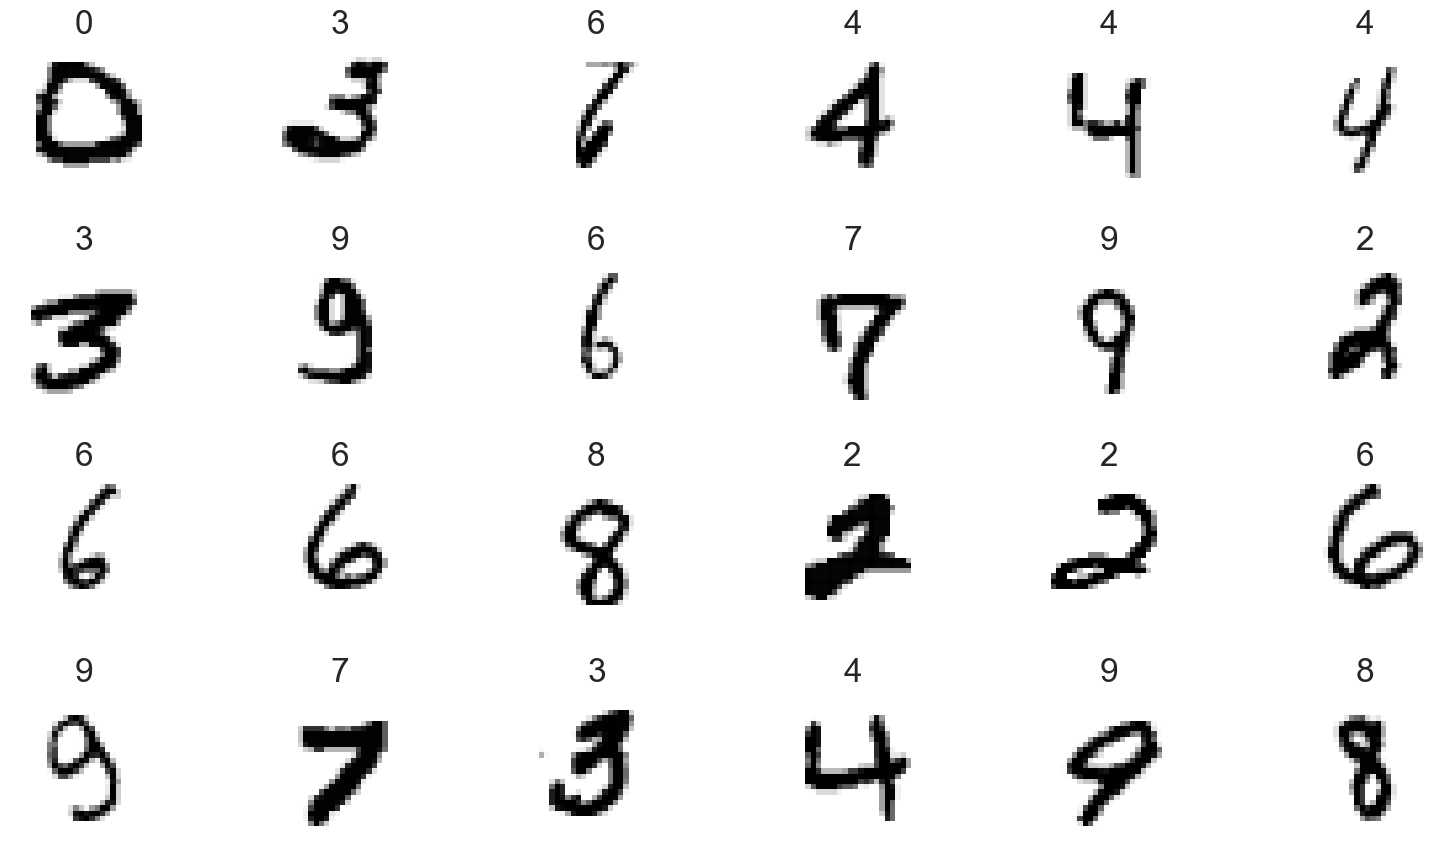

In [14]:
figure , axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), X_train[indice], y_train[indice]):
    axes , image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()
    

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [15]:
X_train = X_train.reshape(60000,28,28,1)

Checa su shape

In [16]:
X_train.shape

(60000, 28, 28, 1)

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [17]:
X_test = X_test.reshape(10000, 28,28,1)

Checa su Shape

In [18]:
X_test.shape

(10000, 28, 28, 1)

Normaliza con astype Xtrain

In [19]:
X_train = X_train.astype('float32')/255

Normaliza con astype Xtest

In [20]:
X_test = X_test.astype('float32')/255

Desde tensorflow importa to_categorical

In [21]:
from keras.api.utils import to_categorical

aplicalo a Y_train

In [22]:
y_train = to_categorical(y_train)

Checa su shape

In [23]:
y_train.shape

(60000, 10)

Checa el primer dato de Y_train

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Aplica to_categorical a Y-test

In [25]:
y_test = to_categorical(y_test)

Checa su figura

In [26]:
y_test.shape

(10000, 10)

### Crear la Red Neuronal

Importa Sequential desde tf

In [27]:
from keras.api.models import Sequential

Crea tu objeto cnn

In [28]:
cnn = Sequential()

importa las capas que necesitaras desde tf

In [29]:
from keras.api.layers import Dense, Flatten, Conv2D, MaxPooling2D

agrega la capa de Conv2d

In [30]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', input_shape=(28,28,1))) #Image pequeña 64 filtros, kernel depende del tamaño de la imagen

C:\Users\crist\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ahora agrega una capa de Pooling2d

In [31]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [32]:
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

Y otra de Pooling

In [33]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplana los resultados

In [34]:
cnn.add(Flatten())

Agrega una capa DENSE

In [35]:
cnn.add(Dense(units=128,activation='relu'))

Y otra DENSE

In [36]:
cnn.add(Dense(units=10,activation='softmax'))

Imprime el resultado en un resumen

In [37]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

Visualiza la estructura del modelo

In [38]:
from keras.api.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='a.png',show_shapes=True, show_layer_names=True)
Image(filename="a.png")

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'a.png'

Compila tu modelo

In [39]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [40]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8967 - loss: 0.3423 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9873 - loss: 0.0438 - val_accuracy: 0.9888 - val_loss: 0.0411
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9932 - loss: 0.0198 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9954 - loss: 0.0135 - val_accuracy: 0.9913 - val_loss: 0.0307


Evalua le modelo con Evaluate

In [41]:
loss , accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0427


In [42]:
loss

0.03129778429865837

In [43]:
accuracy

0.9907000064849854

Vamos a hacer predicciones

In [44]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


checa que dice el primer elemento de ytest

In [45]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Y ahora que dice el primer elemento del modelo

In [50]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000013927%
1: 0.0000000408%
2: 0.0000013458%
3: 0.0000001125%
4: 0.0000000003%
5: 0.0000000032%
6: 0.0000000000%
7: 99.9999880791%
8: 0.0000000096%
9: 0.0000110899%


Ubiquemos las predicciones incorreectas

In [51]:
imges = X_test.reshape((10000,28,28))
incorrect_predictions = []

In [54]:
for i , (p,e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i,imges[i],predicted,expected))

Obten el largo de esa lista

In [55]:
len(incorrect_predictions)

93

Visualiza las predicciones incorrectas

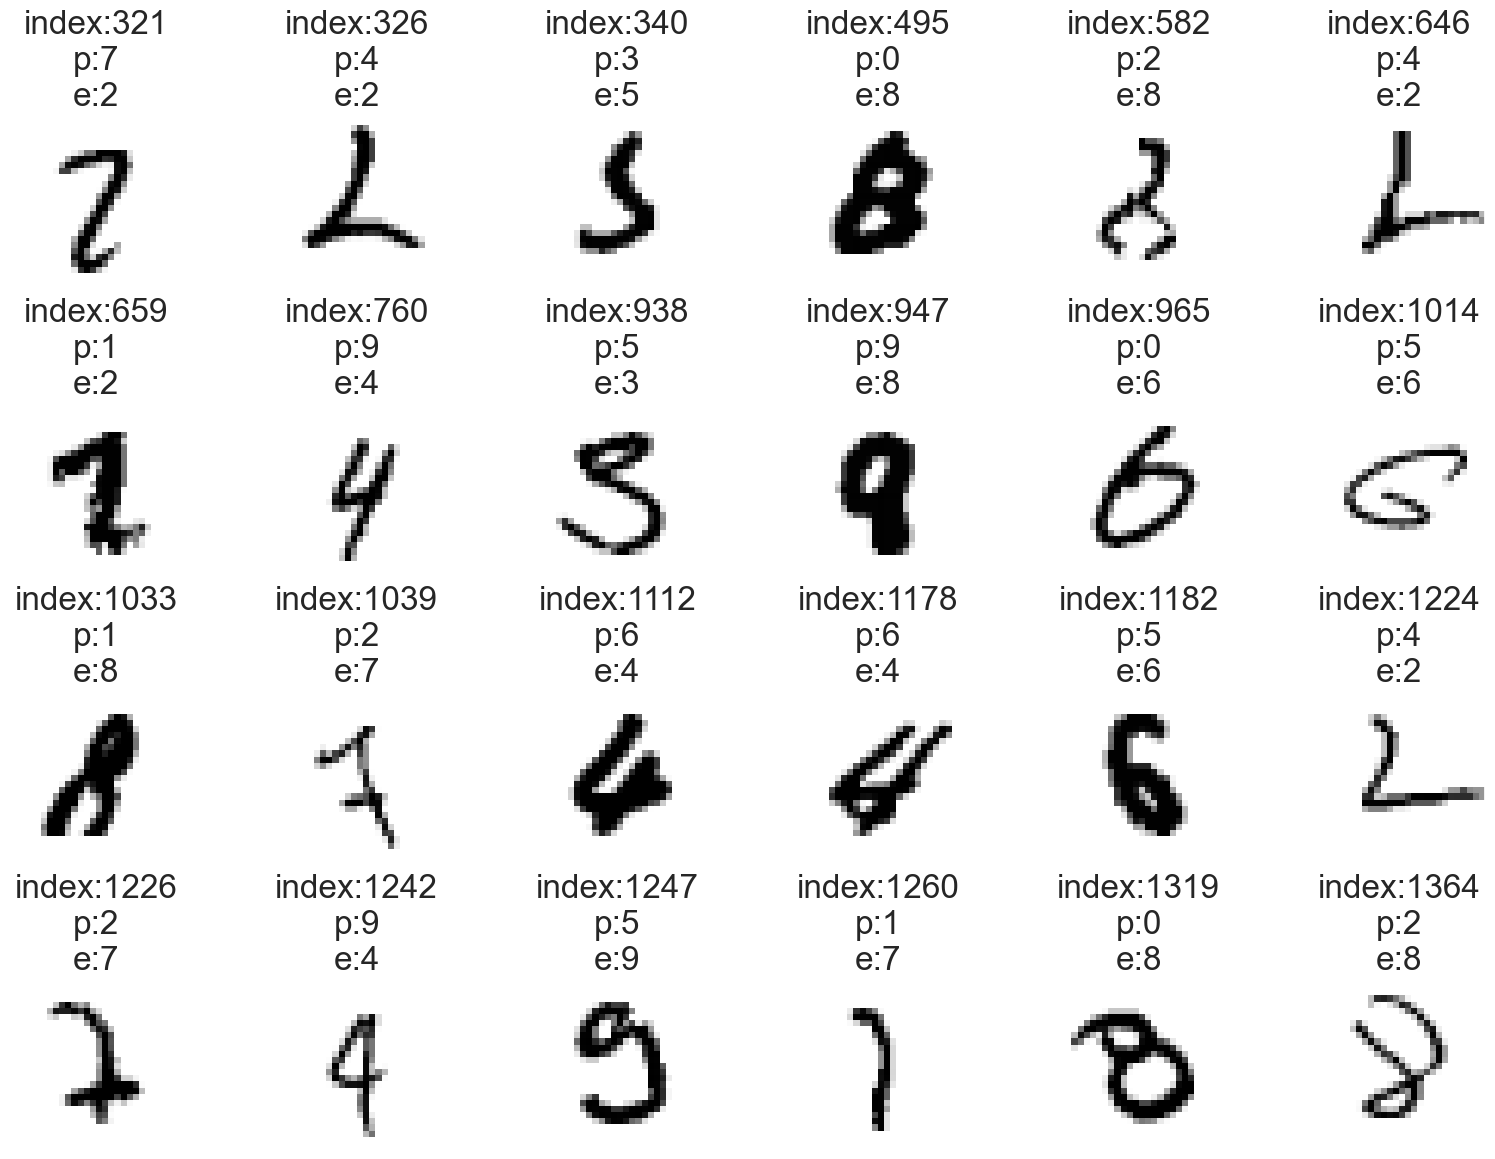

In [57]:
figure, axes = plt.subplots(nrows=4,ncols=6,figsize=(16,12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index:{index}\np:{predicted}\ne:{expected}')
plt.tight_layout()

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

In [58]:
def show_pron(predictions):
    for index , probability, in enumerate(predictions):
        print(f'{index}: {probability:.10%}')

Muestra una que otra predicción incorrecta a detalles

In [62]:
show_pron(predictions[582])

0: 0.0002924429%
1: 0.0009958465%
2: 71.0952281952%
3: 3.5155374557%
4: 0.0007382585%
5: 0.0000483838%
6: 0.0001239924%
7: 0.0001096087%
8: 25.3869205713%
9: 0.0000015634%


### Guardar tu Modelo

In [66]:
cnn.save("mnist_cnn2.keras")

In [68]:
#para cargar el modelo
from keras.api.models import load_model

In [70]:
cnn = load_model("mnist_cnn2.h5")

## Analisis de Sentimientos con Redes Neuronales - IMDB

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

In [67]:
from keras.api.datasets import imdb

Carga las 10000 palabras que mas ocurren

In [83]:
number_words = 10000

Carga tus palabras en tus datasets X_train y X_test y asi

In [84]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=number_words)

### Exploracion de Datos

Figura de X_train

In [96]:
X_train.shape


(60000, 28, 28, 1)

Figura de Y_train

In [86]:
y_train.shape

(25000,)

Figura de X_test

In [87]:
x_test.shape

(25000,)

Figura de y_test

In [88]:
y_test.shape

(25000,)

Apaga pretty print

In [97]:
%pprint

Pretty printing has been turned OFF


Checa un elemento cualquiera de X_train

In [99]:
X_train[1500]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Llama la función word to index

In [100]:
word_to_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Checa el indice de la palabra "bad"

In [104]:
word_to_index["or"]

39

Reversa el mapeo del diccionario Word to INdex a Index to Word

In [105]:
index_to_word = {index:word for (word, index) in word_to_index.items()}

In [106]:
index_to_word[39]

'or'

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

In [107]:
[index_to_word[i] for i in range(1,51)]

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more']

Ok, ya estamos listos para leer una reseña

In [110]:
" ".join([index_to_word.get(i-3,"?") for i in x_train[123]])

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

Y revisa de Y_train la clasificacion de esta reseña

In [111]:
y_train[123]

1

### Preparación de datos

Define palabras_por_reseña en 200

In [112]:
num_pal = 200

Importa pad_sequences de tensroflow

In [120]:
from keras.api.preprocessing.sequence import pad_sequences

Define X_train como pad_sequences del viejo X_train

In [121]:
X_train = pad_sequences(X_train, maxlen=num_pal)

Checa el nuevo shape de X_train

In [122]:
X_train.shape

(60000, 200, 28, 1)

Hay que reconfigurar X_Test tambien

In [123]:
X_test = pad_sequences(X_test, maxlen=num_pal)

Checa su figura

In [124]:
X_test.shape

(10000, 200, 28, 1)

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

In [118]:
from sklearn.model_selection import train_test_split

In [127]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.20, random_state=11)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 25000]

Checa la figura de xtest

Y la de XVal

### Crear la red neuronal

Desde Tensorflow importa Sequencial

arma el objeto rnn com oun sequential

Importa las capas Dense y LSTM

Importa Embedding

Agrega la capa de Embedding, que salgan 128 dimensiones

agrega la capa de LSTM

Agrega una capa DENSE

Compila el RNN

Y resvisa el resultado de RNN

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

Checa tus resultados

Y revisa el resultado